<a href="https://colab.research.google.com/github/Klrojasm/SyS/blob/main/trabajo_en_clase_23_de_Noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios

1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.

2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://ccrma.stanford.edu/~jos/sasp/Window_Method_FIR_Filter.html#:~:text=The%20window%20method%20for%20digital,and%20windows%20for%20spectrum%20analysis)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR.

3. Incluya la implementación del filtro `firwin` en el punto 1.

In [15]:
##Desarrollo
#Primeramente se instalan las librerias necesarias.
from IPython.display import Markdown as md
import soundfile as sf
from IPython.display import Audio
from scipy.signal import butter
from scipy.signal import lfilter, filtfilt

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from scipy.signal import freqz_zpk
from scipy.signal import cheby1, filtfilt

In [8]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
link="https://www.youtube.com/watch?v=-xNzx_9APdE"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}
!ffmpeg -y -i audio.mp3 output.wav
!pip install soundfile
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 10.3 MB/s eta 0:00:00
  Created 

In [9]:
#@markdown Se deben colocar los valores (intervalo de analisis), paso de banda o de corte etc,

#@markdown *el tiempo inicial y final se encuentra en segundos y las frecuencias de corte en HZ*
music_out = "output.wav"
x, fs = sf.read(music_out)
x2 = x.copy()

tiempo_inicial =  25# @param
tiempo_final =  35# @param
ti = tiempo_inicial
tf = tiempo_final
xs = x2[int(ti*fs):int((tf*fs)),:]
K= int(len(xs)/2) + 1
print(f'Audion Original')
Audio([xs[:,1], xs[:,0]],rate=fs) #segmento de audio

Audion Original


Audio filtrado


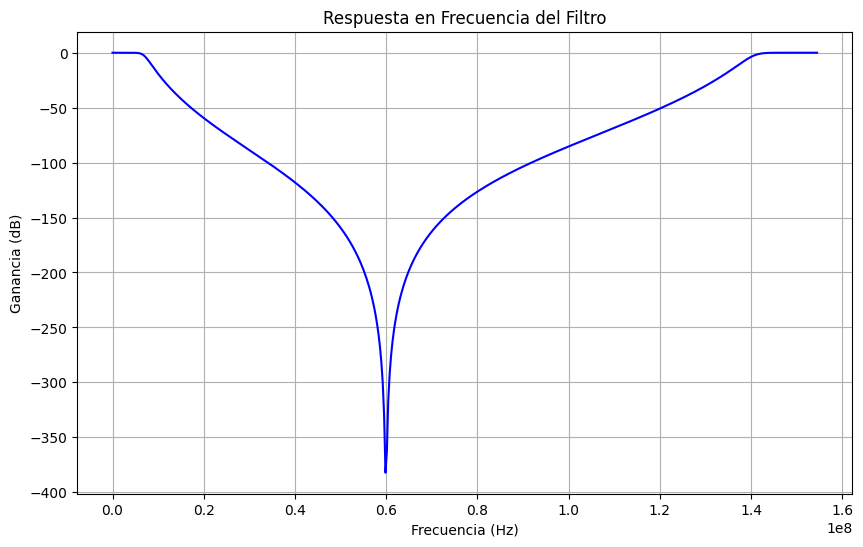

In [33]:
#@markdown * Para filtrado paso alto utilizar: highpass
#@markdown * Para filtrado paso bajo utilizar: lowpass
#@markdown * Para filtrado pasabada utilizar: bandpass
#@markdown * Para filtrado rechazabanda utilizar:bandstop
filtro = "bandstop" #@param {type:'string'}
orden = 6 #@param
frecuencia_de_corte1= 1000 # @param
frecuencia_de_corte2= 20000 # @param
if filtro == 'highpass' or filtro =='lowpass':
  Wn=frecuencia_de_corte1
elif filtro == 'bandpass' or filtro=='bandstop':
  Wn=[frecuencia_de_corte1,frecuencia_de_corte2]
N = orden

# Diseñar el filtro
num, den = butter(N, Wn=Wn, btype=filtro, output='ba', fs=fs)

# Filtrar la señal
xf = filtfilt(num, den, xs, axis=0)

# Imprimir mensaje y mostrar el resultado
print('Audio filtrado')
Audio([xf[:, 1], xf[:, 0]], rate=fs)

# Graficar la respuesta en frecuencia del filtro
w, h = freqz(num, den, fs=fs)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.show()

Audio filtrado


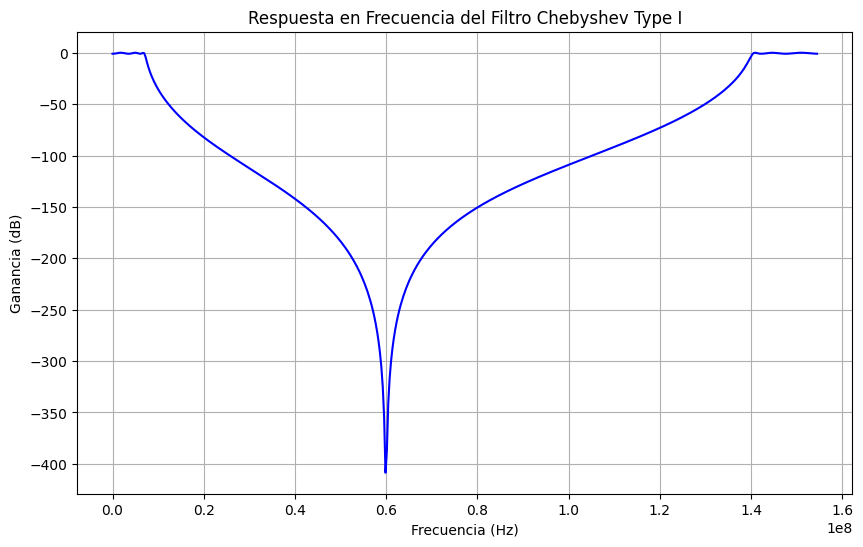

In [32]:
from scipy.signal import cheby1, filtfilt, freqz
import matplotlib.pyplot as plt
from IPython.display import Audio
#@markdown * Para filtrado pasabada utilizar: bandpass
#@markdown * Para filtrado rechazabanda utilizar:bandstop
filtro = "bandstop"  #@param {type:'string'}
orden = 6 #@param
rp = 1  # Parámetro de la máxima ondulación permitida en la banda de paso

# Definir las frecuencias de corte según el tipo de filtro
frecuencia_de_corte1= 1000 # @param
frecuencia_de_corte2= 20000 # @param
if filtro == 'highpass' or filtro == 'lowpass':
    Wn = frecuencia_de_corte1
elif filtro == 'bandpass' or filtro == 'bandstop':
    Wn = [frecuencia_de_corte1, frecuencia_de_corte2]

N = orden


# Diseñar el filtro Chebyshev tipo I
num, den = cheby1(N, rp, Wn=Wn, btype=filtro, analog=False, output='ba', fs=fs)

# Filtrar la señal
xf = filtfilt(num, den, xs, axis=0)

# Imprimir mensaje y mostrar el resultado
print('Audio filtrado')
Audio([xf[:, 1], xf[:, 0]], rate=fs)

# Graficar la respuesta en frecuencia del filtro
w, h = freqz(num, den, fs=fs)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Type I')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.show()

Audio filtrado


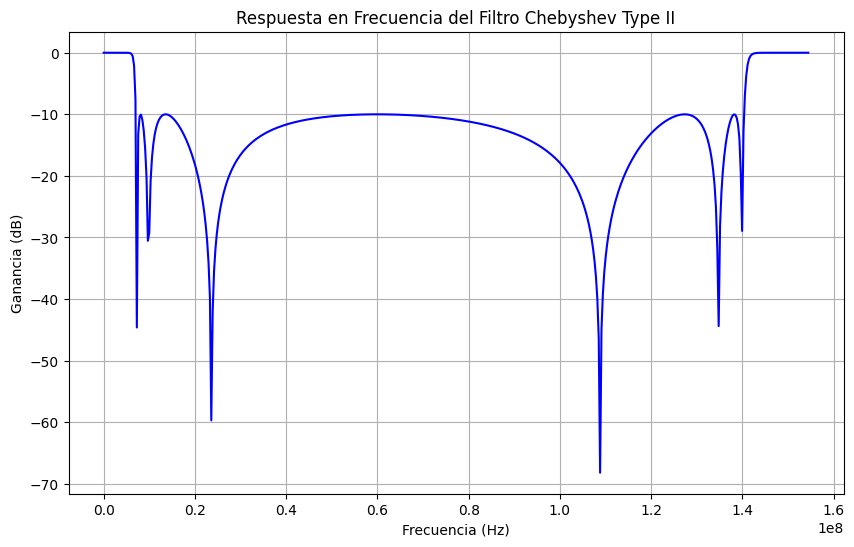

In [35]:
from scipy.signal import cheby2, filtfilt, freqz
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parámetros del filtro
filtro = "bandstop"  #@param {type:'string'}
orden = 6
rp = 10  # Parámetro de la máxima ondulación permitida en la banda de paso

# Definir las frecuencias de corte según el tipo de filtro
frecuencia_de_corte1= 1000 # @param
frecuencia_de_corte2= 20000 # @param
if filtro == 'highpass' or filtro == 'lowpass':
    Wn = frecuencia_de_corte1
elif filtro == 'bandpass' or filtro == 'bandstop':
    Wn = [frecuencia_de_corte1, frecuencia_de_corte2]

N = orden

# Diseñar el filtro Chebyshev tipo II
num, den = cheby2(N, rp, Wn=Wn, btype=filtro, analog=False, output='ba', fs=fs)

# Filtrar la señal
xf = filtfilt(num, den, xs, axis=0)

# Imprimir mensaje y mostrar el resultado
print('Audio filtrado')
Audio([xf[:, 1], xf[:, 0]], rate=fs)

# Graficar la respuesta en frecuencia del filtro
w, h = freqz(num, den, fs=fs)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Chebyshev Type II')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.show()

Audio filtrado


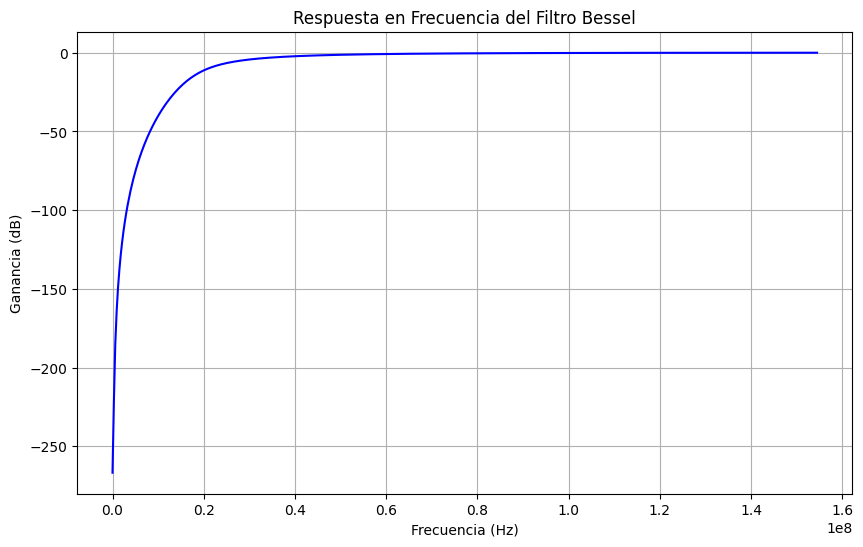

In [50]:
from scipy.signal import bessel, filtfilt, freqz
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parámetros del filtro
filtro = "highpass"  #@param {type:'string'}
orden = 6
# Definir las frecuencias de corte según el tipo de filtro
frecuencia_de_corte1= 5000 # @param
frecuencia_de_corte2= 20000 # @param
if filtro == 'highpass' or filtro == 'lowpass':
    Wn = frecuencia_de_corte1
elif filtro == 'bandpass' or filtro == 'bandstop':
    Wn = [frecuencia_de_corte1, frecuencia_de_corte2]

N = orden
normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
# Diseñar el filtro Bessel
num, den = bessel(N, Wn=Wn, btype=filtro, norm=normalization, output='ba', fs=fs)

# Filtrar la señal
xf = filtfilt(num, den, xs, axis=0)

# Imprimir mensaje y mostrar el resultado
print('Audio filtrado')
Audio([xf[:, 1], xf[:, 0]], rate=fs)

# Graficar la respuesta en frecuencia del filtro
w, h = freqz(num, den, fs=fs)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Bessel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.show()

Audio filtrado


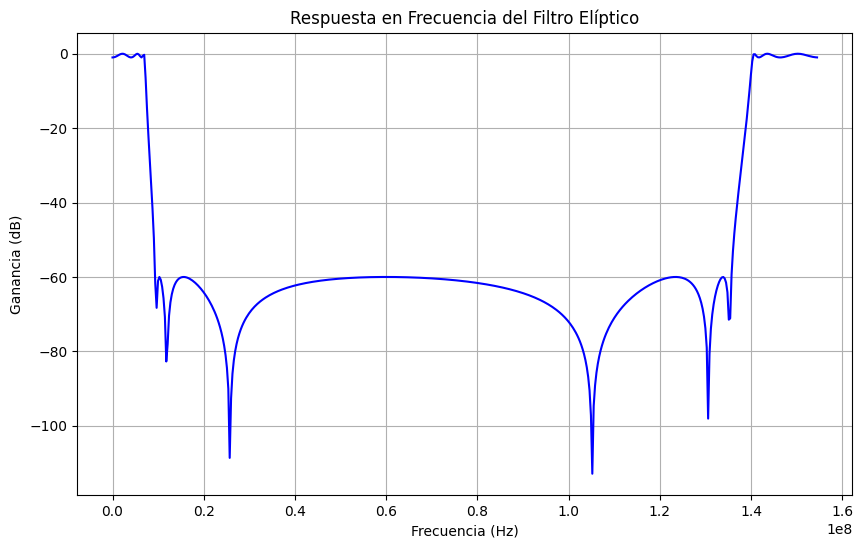

In [51]:
from scipy.signal import ellip, filtfilt, freqz
import matplotlib.pyplot as plt
from IPython.display import Audio

# Parámetros del filtro
filtro = "bandstop"  #@param {type:'string'}
orden = 6 #@param
rp = 1  # Parámetro de la máxima ondulación permitida en la banda de paso
rs = 60  # Parámetro de la mínima atenuación en la banda de rechazo

# Definir las frecuencias de corte según el tipo de filtro
frecuencia_de_corte1= 1000 # @param
frecuencia_de_corte2= 20000 # @param
if filtro == 'highpass' or filtro == 'lowpass':
    Wn = frecuencia_de_corte1
elif filtro == 'bandpass' or filtro == 'bandstop':
    Wn = [frecuencia_de_corte1, frecuencia_de_corte2]

N = orden

# Diseñar el filtro elíptico
num, den = ellip(N, rp, rs, Wn=Wn, btype=filtro, analog=False, output='ba', fs=fs)

# Filtrar la señal
xf = filtfilt(num, den, xs, axis=0)

# Imprimir mensaje y mostrar el resultado
print('Audio filtrado')
Audio([xf[:, 1], xf[:, 0]], rate=fs)

# Graficar la respuesta en frecuencia del filtro
w, h = freqz(num, den, fs=fs)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Elíptico')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.grid()
plt.show()